In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

import DataPreprocessing
import SmartPolynomials

In [2]:
#combs = ['1,3','1,4','2,3','2,4','1,2,3','1,2,4','2,3,4','1,3,4','1,2,3','1,2,4','2,3,4','1,3,4']
combs = ['1,3','1,4','2,3','2,4','1,2,3','1,2,4','2,3,4','1,3,4','1,2,3','1,2,4','2,3,4','1,3,4']

In [3]:
me_train, mom_train_r = DataPreprocessing.npy('LO/MG_uuuxux/me_4jet_1000000', 'LO/MG_uuuxux/mom_4jet_1000000', combs, frac=1)
me_test, mom_test_r = DataPreprocessing.npy('LO/MG_uuuxux/me_4jet_100000', 'LO/MG_uuuxux/mom_4jet_100000', combs, frac=0.1)
me_train = me_train/10**45
me_test = me_test/10**45

In [4]:
print(np.std(me_train))

1743951053.8319516


In [4]:
step=2000

model = tf.keras.Sequential([keras.layers.Dense(1,activation='linear',input_shape=(43758,))])
sgd=tf.keras.optimizers.SGD(0.0000000001, momentum=0.95, nesterov=True)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

scaler = StandardScaler()

training_error = []
test_error = []
component = []

for n in range(0,len(mom_train_r),step):
    poly_train = SmartPolynomials.smarterPolynomialFeatures(4, mom_train_r[n:n+step])
    ##Rescale
    scaler.partial_fit(poly_train) #Rescale on training set
    poly_train = scaler.transform(poly_train)
    
    model.fit(poly_train, me_train[n:n+step], batch_size=1, epochs=1, shuffle=True)
        
    if(n%50000==0): 
        print(n)
    
        ##Testing Error
        lin_mse = 0
        lin_perc = 0
        me_predictions = np.zeros(len(me_test))
        for m in range(0,len(mom_test_r),200):
            poly_test = SmartPolynomials.smarterPolynomialFeatures(4, mom_test_r[m: m+step])
            poly_test = scaler.transform(poly_test)

            me_predict = model.predict(poly_test) #Prediction on test set
            me_predictions[m:m+step] = me_predict.T
            lin_mse += np.sum(mean_squared_error(me_test[m:m+step], me_predict))
            lin_perc += np.sum(100*np.divide(np.abs(me_test[m:m+step] - me_predict), me_test[m:m+step]))
        test_error.append(np.sqrt(lin_mse*step/len(me_test)))
        
        u=model.evaluate(poly_train, me_train[n:n+step])[0]
        training_error.append(np.sqrt(u))
        
        weights = model.get_weights()[0]
        component.append(*weights[3])
        print(component)       
        print(lin_perc/len(me_test))
        print(training_error)
        print(test_error)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 6898447203188221952.0000 - mean_squared_error: 6898447203188221952.0000

0
2000/2000 [==============================]2000/2000 [==============================] - 0s 199us/step

[-603.21515]
1874907.7472615761
[2625185650.182103]
[7925476653.9725895]
Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 6080789488970224640.0000 - mean_squared_error: 6080789488970224640.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 6624096589737480192.0000 - mean_squared_error: 6624096589737480192.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5890629053736597504.0000 - mean_squared_error: 5890629053736597

2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5986154547484143616.0000 - mean_squared_error: 5986154547484143616.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 6126266462931137536.0000 - mean_squared_error: 6126266462931137536.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 6458945808152610816.0000 - mean_squared_error: 6458945808152610816.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5892767747272830976.0000 - mean_squared_error: 5892767747272830976.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5879653236595150848.0000 - mean_squared_error: 5879653236595150848.0000

Epoch 1/1
2000/2000 [==============================]2000/200

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5790528997110408192.0000 - mean_squared_error: 5790528997110408192.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5772940702924986368.0000 - mean_squared_error: 5772940702924986368.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5733838338378312704.0000 - mean_squared_error: 5733838338378312704.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5859556056349099008.0000 - mean_squared_error: 5859556056349099008.0000

Epoch 1/1
2000/2000 [==============================]2000/2000 [==============================] - 2s 1ms/step - loss: 5543673917860064256.0000 - mean_squared_error: 5543673917860064256.0000

350000


KeyboardInterrupt: 

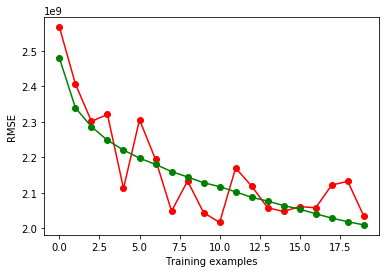

In [11]:
import matplotlib.pyplot as pyplot
pyplot.figure()

pyplot.xlabel("Training examples")
pyplot.ylabel("RMSE")
pyplot.plot(np.array(training_error), 'o-', color="r",
             label="Training score")
pyplot.plot(np.array(test_error), 'o-', color="g",
             label="Cross-validation score")

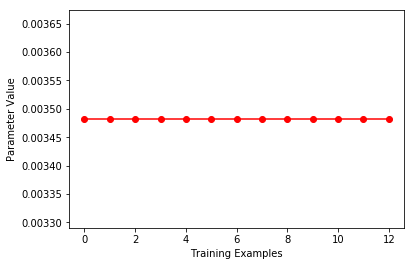

In [9]:
pyplot.figure()

pyplot.xlabel("Training Examples")
pyplot.ylabel("Parameter Value")
pyplot.plot(component, 'o-', color="r",
             label="Training score")

In [12]:
print(me_test)

[3663531451.021101 2130843365.7687101 213745031.6748882 ...
 1627440181.9145424 264034853.31936815 557173355.4631606]


In [13]:
print(np.std(me_test))

1727722955.9776702


In [12]:
print(training_error)

[0.908730330956175, 0.3509328261494746, 0.277377828304248, 0.26022305515787325, 0.2109629447566608, 0.21506917474139448, 0.1809126925715772, 0.18283602893241724, 0.1703471802150222, 0.16264743646613883, 0.1589364232333585, 0.1454613890998141, 0.14944882750127808]
